# Radon Concentration
## Data Import and Clensing

In [1]:
import requests
import pandas as pd
url = 'https://health.canada.ca/apps/open-data/radon-concentrations/radon-concentration.csv'
dfs = pd.read_csv(url)

In [2]:
dfs.shape

(13815, 13)

In [3]:
dfs.head()

,ResultNumber,ProvinceTerritory,Health Region2007,HealthRegionCode2007,ForwardSortationAreaCodes,TestDurationInDays,AverageRadonConcentrationInBqPerM3,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,1.0,NL,Eastern Regional Integrated Health Authority,1011.0,A0A,127.0,20,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,NL,Eastern Regional Integrated Health Authority,1011.0,A0A,108.0,36,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,NL,Eastern Regional Integrated Health Authority,1011.0,A0E,91.0,<15,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,NL,Eastern Regional Integrated Health Authority,1011.0,A0A,91.0,31,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,NL,Eastern Regional Integrated Health Authority,1011.0,A0C,98.0,26,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dfs.describe()

,ResultNumber,HealthRegionCode2007,TestDurationInDays,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
count,13814.000000,13814.000000,13814.000000,0.0,0.0,0.0,0.0,0.0,0.0
mean,6907.500000,3717.666932,96.680469,NaN,NaN,NaN,NaN,NaN,NaN
std,3987.902644,1544.719745,14.612814,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1011.000000,30.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,3454.250000,2411.000000,91.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,6907.500000,3557.000000,92.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,10360.750000,4714.000000,98.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,13814.000000,6201.000000,456.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dfs = dfs.dropna(axis=1, how='all').drop(['ResultNumber'], axis=1)

In [6]:
dfs.dtypes

ProvinceTerritory                      object
Health Region2007                      object
HealthRegionCode2007                  float64
ForwardSortationAreaCodes              object
TestDurationInDays                    float64
AverageRadonConcentrationInBqPerM3     object
dtype: object

In [7]:
(dfs.groupby(['Health Region2007'])['HealthRegionCode2007'].unique().value_counts()>1).sum()

0

In [8]:
(dfs.groupby(['HealthRegionCode2007'])['Health Region2007'].unique().value_counts()>1).sum()

0

Thus HealthReggionCode2007 corresponds to Health Region 2007, so we can drop the code column.

In [9]:
dfs=dfs.drop(['HealthRegionCode2007'], axis=1)

In [10]:
dfs[dfs.isnull().any(axis=1)]

,ProvinceTerritory,Health Region2007,ForwardSortationAreaCodes,TestDurationInDays,AverageRadonConcentrationInBqPerM3
13814,NaN,NaN,NaN,NaN,NaN


In [11]:
dfs.dropna(inplace=True)

In [12]:
dfs.isna().sum().sum()

0

In [13]:
dfs[dfs['AverageRadonConcentrationInBqPerM3'].apply(lambda x: not x.isnumeric())]['AverageRadonConcentrationInBqPerM3'].value_counts()

<15    2585
Name: AverageRadonConcentrationInBqPerM3, dtype: int64

We impute 7.5 to entry with radon concentration less than 15.

In [14]:
dfs['AverageRadonConcentrationInBqPerM3'].replace('<15', 7.5, inplace=True)

In [15]:
dfs['AverageRadonConcentrationInBqPerM3'] = dfs['AverageRadonConcentrationInBqPerM3'].astype('float64')
dfs.dtypes

ProvinceTerritory                      object
Health Region2007                      object
ForwardSortationAreaCodes              object
TestDurationInDays                    float64
AverageRadonConcentrationInBqPerM3    float64
dtype: object

## Exploratory Data Analysis

In [16]:
dfs.head()

,ProvinceTerritory,Health Region2007,ForwardSortationAreaCodes,TestDurationInDays,AverageRadonConcentrationInBqPerM3
0,NL,Eastern Regional Integrated Health Authority,A0A,127.0,20.0
1,NL,Eastern Regional Integrated Health Authority,A0A,108.0,36.0
2,NL,Eastern Regional Integrated Health Authority,A0E,91.0,7.5
3,NL,Eastern Regional Integrated Health Authority,A0A,91.0,31.0
4,NL,Eastern Regional Integrated Health Authority,A0C,98.0,26.0


In [17]:
dfs.describe()

,TestDurationInDays,AverageRadonConcentrationInBqPerM3
count,13814.000000,13814.000000
mean,96.680469,96.434451
std,14.612814,170.463366
min,30.000000,7.500000
25%,91.000000,19.000000
50%,92.000000,47.000000
75%,98.000000,114.000000
max,456.000000,5657.000000


In [18]:
import matplotlib.pyplot as plt
province = dfs['ProvinceTerritory'].value_counts()
plt.bar(province.index, province.values)
plt.title("Observation Frequency in Each Province")

Text(0.5,1,'Observation Frequency in Each Province')

(array([1.400e+01, 1.400e+02, 8.241e+03, 4.471e+03, 6.820e+02, 1.600e+02,
        5.400e+01, 2.500e+01, 1.000e+01, 5.000e+00, 0.000e+00, 3.000e+00,
        4.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 30. ,  51.3,  72.6,  93.9, 115.2, 136.5, 157.8, 179.1, 200.4,
        221.7, 243. , 264.3, 285.6, 306.9, 328.2, 349.5, 370.8, 392.1,
        413.4, 434.7, 456. ]),
 <a list of 20 Patch objects>)

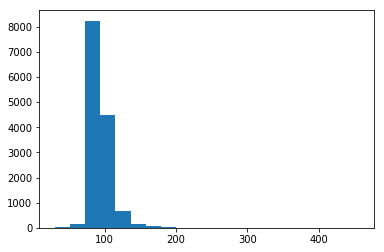

In [19]:
plt.hist(dfs['TestDurationInDays'], bins=20)

(array([24., 27., 33., 25.,  7.,  3.,  0.,  0.,  0.,  2.]),
 array([ 93.36792453,  94.83113208,  96.29433962,  97.75754717,
         99.22075472, 100.68396226, 102.14716981, 103.61037736,
        105.07358491, 106.53679245, 108.        ]),
 <a list of 10 Patch objects>)

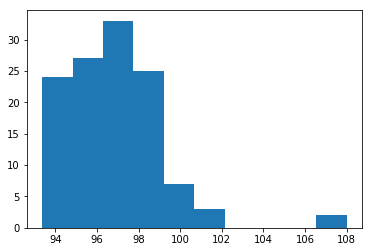

In [20]:
average_days = dfs.groupby(['Health Region2007'])['TestDurationInDays'].mean()
plt.hist(average_days)

<BarContainer object of 13 artists>

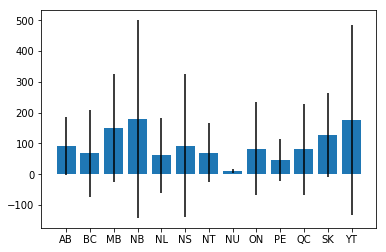

In [21]:
average_concentration = dfs.groupby(['ProvinceTerritory'])['AverageRadonConcentrationInBqPerM3'].mean()
std_concentration =  dfs.groupby(['ProvinceTerritory'])['AverageRadonConcentrationInBqPerM3'].std()
plt.bar(average_concentration.index, average_concentration.values, yerr=std_concentration)